Housing Price Prediction Case Study

Multiple Linear Regression
Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —
To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
To know the accuracy of the model, i.e. how well these variables can predict house prices.

Dataset-
Use Housing Prices Dataset.

In [6]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
#load dataset
df=pd.read_csv("C:\\Users\\spred\\OneDrive\\Documents\\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
#check for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
#check for duplicates
print(df.duplicated().sum())

0


In [10]:
df.shape

(545, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


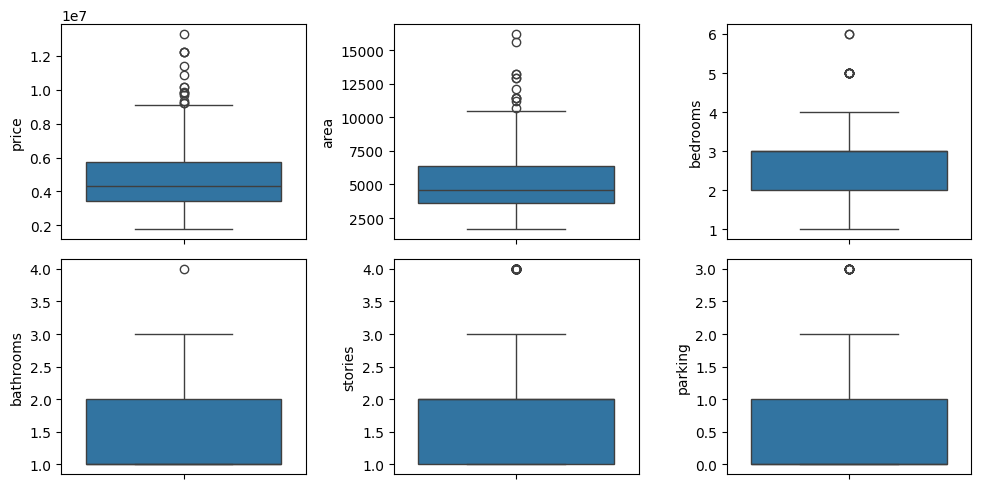

In [13]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

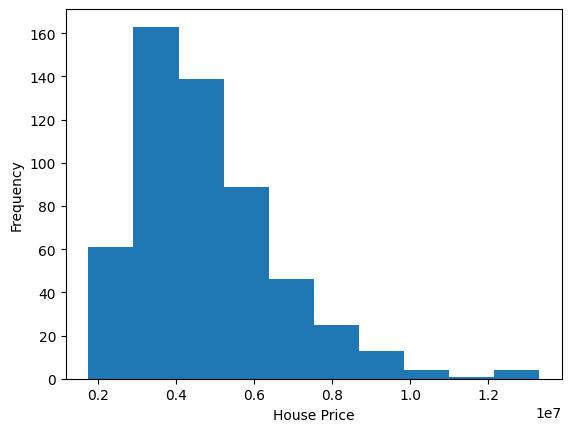

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

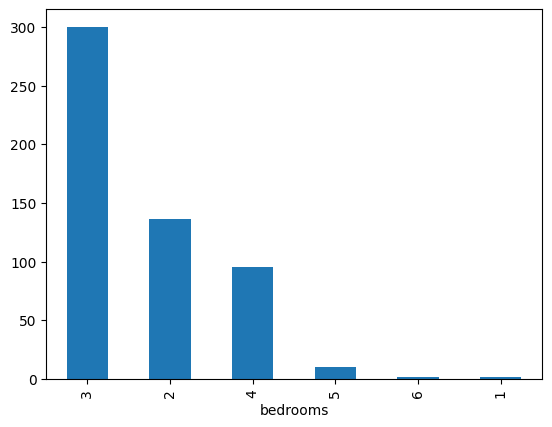

In [15]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.show()

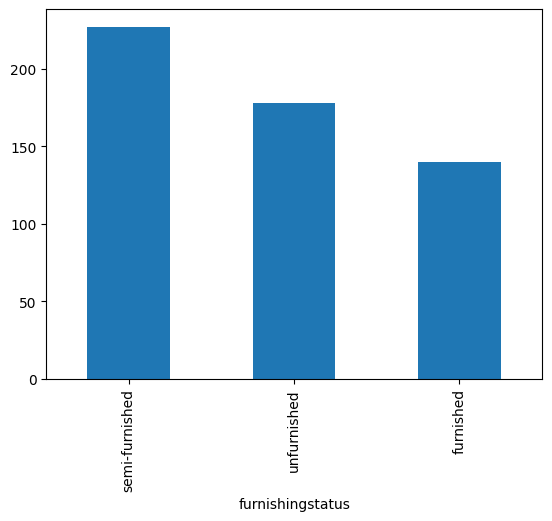

In [16]:
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.show()

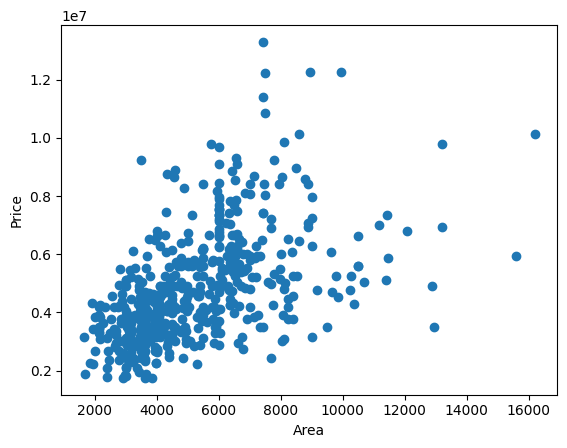

In [17]:
plt.scatter(df['area'], df['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

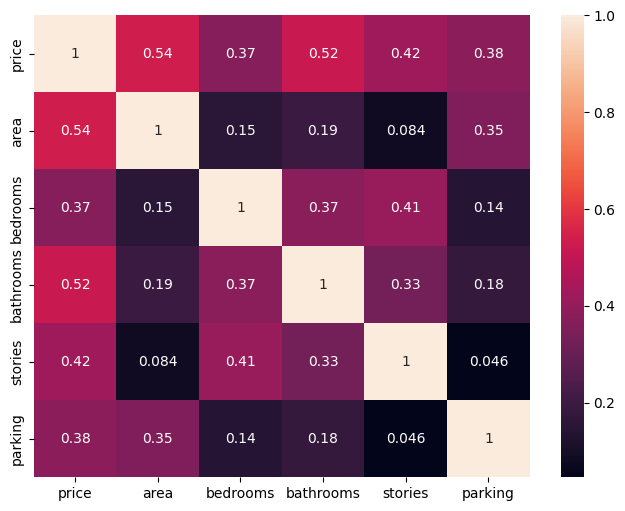

In [18]:
num_cols = df.select_dtypes(include=['int64'])
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols.columns].corr(), annot=True)
plt.show()

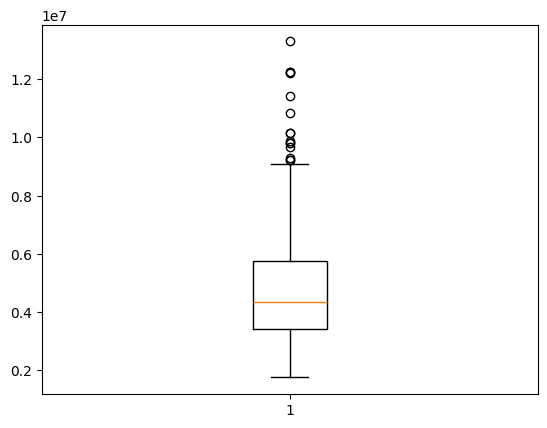

In [19]:
plt.boxplot(df['price'])
plt.show()

In [20]:
x = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2750040479309.0513
R2 Score: 0.45592991188724474


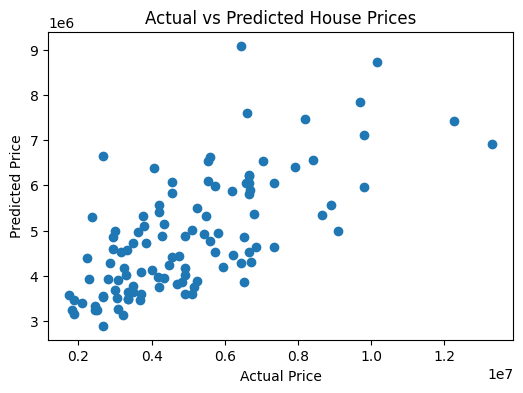

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [24]:
model.coef_
model.intercept_

np.float64(59485.379208716564)

                           Metric         Value
0        Mean Squared Error (MSE)  2.750040e+12
1  Root Mean Squared Error (RMSE)  1.658325e+06
2                        R2 Score  4.559299e-01


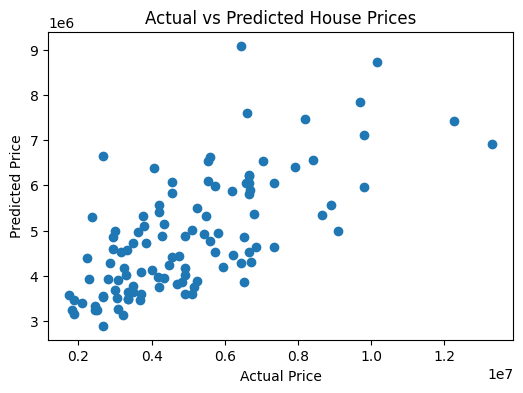

In [25]:
# Model Performance Metrics - Single Code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Performance Matrix
performance_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R2 Score"],
    "Value": [mse, rmse, r2]
})

print(performance_df)

# Actual vs Predicted Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

📊 Model Performance Insights

1. Moderate Prediction Accuracy
The scatter plot shows a positive relationship between actual and predicted house prices, indicating that the Linear Regression model captures the overall trend reasonably well.


2. R² Score Interpretation (~0.456)
An R² score of approximately 0.46 means the model explains about 46% of the variation in house prices. This suggests a moderate model performance, but there is room for improvement.


3. Prediction Errors Increase for High-Priced Houses
The spread of points increases for higher actual prices, indicating that the model struggles to accurately predict expensive houses.


4. Underfitting Behavior
Many predicted prices are concentrated in a narrow range compared to actual prices, which suggests the model may be underfitting due to limited features.


5. RMSE Value Insight
The RMSE is relatively high, meaning the average prediction error is significant when compared to the range of house prices.


6. Feature Limitation Impact
Only three features (area, bedrooms, bathrooms) were used. Excluding other important variables such as location, furnishing status, and amenities likely reduced model accuracy.

📝 Conclusion 

> The Linear Regression model demonstrates moderate performance in predicting house prices. While it successfully captures the general trend, its accuracy decreases for high-priced properties. Incorporating additional relevant features and more advanced regression techniques could improve predictive performance.